#Projeto de Calculo Numerico
Grupo:


*   Pedro Henrique Amaro Ferreira Lacerda
*   Julia Maria
*   Jonathan Pablo


## Questão 1
Topico 1, questão 2. </br>
Respondido por Pedro Amaro.

### Imports

In [ ]:
import numpy as np
from numpy import linalg
import pprint

### Declarações

In [ ]:
class Matrix_nxn:
  def __init__(self, n):
    self.n = n
    self.m = 0
    self.q = 0
    self.args = {}
    self.estoque = {}
    self.Matrix = []
    self.quantidades = []

  def add(self, nome, array):
    if self.m <= self.n:
      self.args.update({nome:array})
      self.Matrix.append(array)
      self.m = self.m+1
    else:
      print("Matriz nxn está cheia. Declare uma matriz maior para inserir mais dados.")

  def add_estoque(self, nome, quant):
    if self.q <= self.n:
      self.quantidades.append(quant)
      self.estoque.update({nome:quant})
      self.q = self.q+1
    else:
      print("Matriz nxn está cheia. Declare uma matriz maior para inserir mais dados.")
  
  def dados(self):
    pprint.pprint(self.args)
    pprint.pprint(self.estoque)

  def resolva(self):
    a = np.asarray(self.Matrix)
    b = np.asarray(self.quantidades)
    print(linalg.solve(a,b))

### Entrada de dados

In [ ]:
M = Matrix_nxn(3)

In [ ]:
M.add('Metal', [15, 17, 19])
M.add('Plastico', [0.3, 0.4, 0.55])
M.add('Borracha', [1, 1.2, 1.5])
M.add_estoque('Metal', 3.89)
M.add_estoque('Plastico', 0.095)
M.add_estoque('Borracha', 0.282)
M.dados()

{'Borracha': [1, 1.2, 1.5], 'Metal': [15, 17, 19], 'Plastico': [0.3, 0.4, 0.55]}
{'Borracha': 0.282, 'Metal': 3.89, 'Plastico': 0.095}


In [ ]:
print(M.Matrix)
print(M.quantidades)

[[15, 17, 19], [0.3, 0.4, 0.55], [1, 1.2, 1.5]]
[3.89, 0.095, 0.282]


In [ ]:
M.resolva()

[0.09 0.06 0.08]


###Teste
Resolve a questão 1 da segunda lista da unidade 2.

In [ ]:
M = Matrix_nxn(3)

In [ ]:
M.add('A', [1, 2, 3])
M.add('B', [2, 0, 1])
M.add('C', [4, 1, 2])
M.add_estoque('A', 16)
M.add_estoque('B', 13)
M.add_estoque('C', 27)
M.dados()

{'A': [1, 2, 3], 'B': [2, 0, 1], 'C': [4, 1, 2]}
{'A': 16, 'B': 13, 'C': 27}


In [ ]:
M.resolva()

[5. 1. 3.]


## Questão 2
Questão 2, tópico 2

Respondida por Júlia Maria






### versão texto

```
from __future__ import division  
import numpy as np  
import os
from numpy import array, zeros, diag, diagflat, dot

def jacobi(A,b,it,x0 = None):
    x = zeros(len(A[0]))    #cria um vetor de zeros que irá receber os resultados das iterações
    D = diag(A)             #pega os elementos da diagonal principal de A e põe em um vetor
    R = A - diagflat(D)     #pega os elementos do vetor D e põe em uma matriz quadrada escalonada

    # Faz o número de iterações desejado pelo usuário
    for i in range(0,it):
        x = (b - dot(R,x)) / D  
                    
    return x

 
def gauss_seidel(A,b,x0,tol,N):  
    n=np.shape(A)[0]  #retornar o número de linhas em 'A'
    x = np.copy(x0)   # faz uma cópia de X0
    it = 0   
    #iteracoes  
    while (it < N):  
        it = it+1  
        #iteracao de Jacobi. No bloco abaixo , o valor de x[i] é atualizado a cada interação com base em x[j]
        for i in np.arange(n):  
            x[i] = b[i]  
            for j in np.concatenate((np.arange(0,i),np.arange(i+1,n))):  
                x[i] -= A[i][j]*x[j]  
            x[i] /= A[i][i]   
        #tolerancia  
        if (np.linalg.norm(x-x0,np.inf) < tol):  
            return x  
        #prepara nova iteracao  
        x0 = np.copy(x)  
    raise NameError('num. max. de iteracoes excedido.')
    
#-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==--=-
eq = int(input('Digite o número de equações do sistema: '))
co = int(input('Digite o número de coeficientes do sistema: '))
os.system('cls')

aux = []
A = []
b = []
x0 = []
for i in range(0, eq):
    for j in range(0, co):
        aux2 = float(input('Digite o coeficiente A{}{} do sistema:  '.format(i+1, j+1)))    
        aux.append(aux2)
    A.append(aux)
    aux = []
    aux2 = float(input('Digite o coeficiente B{} do sistema:    '.format(i+1)))
    os.system('cls')
    b.append(aux2)
os.system('cls')   


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

print('\t\tSelecione o método iterativo desejado\n\n')
print('1_\tMétodo de Gauss-Seidel\n')
print('2_\tMétodo de Gauss-Jacobi\n\n')

aux = int(input('\n->\t'))
if aux == 1:
    tol = float(input('Digite a tolerância desejada: '))
    N = int(input('Digite o número máximo de iterações: '))
    for c in range(0, co):
        aux = float(input('Digite o valor inicial do coeficiente x{}: '.format(c+1)))
        x0.append(aux)
    os.system('cls')
    result = gauss_seidel(A, b, x0, tol, N)
    for c in range(0, len(A)):
        print('x{}  =   {}'.format(c+1, result[c]))

elif aux == 2:
    it = int(input('Digite o número de iterações desejada: '))
    x0 = 0
    result = jacobi(A, b, it, x0)
    for c in range(0, len(A)):
        print('x{}  =   {}'.format(c+1, result[c]))

else:
    print('\n\t\tOpção inválida!')
    exit()

```

### versão executavel

In [ ]:
from __future__ import division  
import numpy as np  
import os
from numpy import array, zeros, diag, diagflat, dot

def jacobi(A,b,it,x0 = None):
    x = zeros(len(A[0]))    #cria um vetor de zeros que irá receber os resultados das iterações
    D = diag(A)             #pega os elementos da diagonal principal de A e põe em um vetor
    R = A - diagflat(D)     #pega os elementos do vetor D e põe em uma matriz quadrada escalonada

    # Faz o número de iterações desejado pelo usuário
    for i in range(0,it):
        x = (b - dot(R,x)) / D  
                    
    return x

 
def gauss_seidel(A,b,x0,tol,N):  
    n=np.shape(A)[0]  #retornar o número de linhas em 'A'
    x = np.copy(x0)   # faz uma cópia de X0
    it = 0   
    #iteracoes  
    while (it < N):  
        it = it+1  
        #iteracao de Jacobi. No bloco abaixo , o valor de x[i] é atualizado a cada interação com base em x[j]
        for i in np.arange(n):  
            x[i] = b[i]  
            for j in np.concatenate((np.arange(0,i),np.arange(i+1,n))):  
                x[i] -= A[i][j]*x[j]  
            x[i] /= A[i][i]   
        #tolerancia  
        if (np.linalg.norm(x-x0,np.inf) < tol):  
            return x  
        #prepara nova iteracao  
        x0 = np.copy(x)  
    raise NameError('num. max. de iteracoes excedido.')
    
#-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==--=-
eq = int(input('Digite o número de equações do sistema: '))
co = int(input('Digite o número de coeficientes do sistema: '))
os.system('cls')

aux = []
A = []
b = []
x0 = []
for i in range(0, eq):
    for j in range(0, co):
        aux2 = float(input('Digite o coeficiente A{}{} do sistema:  '.format(i+1, j+1)))    
        aux.append(aux2)
    A.append(aux)
    aux = []
    aux2 = float(input('Digite o coeficiente B{} do sistema:    '.format(i+1)))
    os.system('cls')
    b.append(aux2)
os.system('cls')   


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

print('\t\tSelecione o método iterativo desejado\n\n')
print('1_\tMétodo de Gauss-Seidel\n')
print('2_\tMétodo de Gauss-Jacobi\n\n')

aux = int(input('\n->\t'))
if aux == 1:
    tol = float(input('Digite a tolerância desejada: '))
    N = int(input('Digite o número máximo de iterações: '))
    for c in range(0, co):
        aux = float(input('Digite o valor inicial do coeficiente x{}: '.format(c+1)))
        x0.append(aux)
    os.system('cls')
    result = gauss_seidel(A, b, x0, tol, N)
    for c in range(0, len(A)):
        print('x{}  =   {}'.format(c+1, result[c]))

elif aux == 2:
    it = int(input('Digite o número de iterações desejada: '))
    x0 = 0
    result = jacobi(A, b, it, x0)
    for c in range(0, len(A)):
        print('x{}  =   {}'.format(c+1, result[c]))

else:
    print('\n\t\tOpção inválida!')
    exit()

## Questão 3
Tópico 3, questão 1. </br>
Respondido por Pedro Amaro.

### Imports

In [ ]:
import numpy as np
from numpy import linalg
from matplotlib import pyplot as plt
import math

### Declarações

In [ ]:
class Tabela:
  def __init__(self):
    self.a = [] # ano, nosso x
    self.N = [] # numero de transistores, nosso f(x)
    self.preva = []
    self.prevN = [] 
  
  def add(self, ano, num):
    self.a.append(ano)
    self.N.append(num)

  def preveja_linear(self, ano):
    a11 = len(self.a)
    a12_21 = sum(self.a)
    a22 = 0
    for i in self.a:
      a22 = a22 + i*i
    b1 = sum(self.N)
    b2 = 0
    for i in range(a11):
      b2 = b2 + self.N[i]*self.a[i]

    A = np.array([[a11, a12_21], [a12_21, a22]])
    B = np.array([b1, b2])
    c1, c2 = linalg.solve(A,B)
    y = c1+c2*ano

    self.preva.append(ano)
    self.prevN.append(y)
    print(y)
  
  def preveja_exp(self, ano):
      a11 = 0
      b1 = 0
      b2 = 0
      
      for i in self.a:
        a11 = a11 + i*i

      a12_21 = sum(self.a)

      a22 = len(self.a)

      for i in range(a22):
        b1 = b1 + np.log(self.N[i])*self.a[i]
      
      for i in self.N:
        b2 = b2 + np.log(i)

      A = np.array([[a11, a12_21], [a12_21, a22]])
      B = np.array([b1, b2])
      c1, c2 = linalg.solve(A,B)
      
      A = math.exp(c2)
      B = math.exp(c1)

      y = (A)*(pow(B, ano))

      self.preva.append(ano)
      self.prevN.append(y)
      print(y)

  def dados(self):
    print(self.a)
    print(self.N)

  def plot(self):
    plt.plot(self.a, self.N)
    plt.scatter(self.preva, self.prevN, color="orange")
    plt.show()

### Entrada de Dados

In [ ]:
T = Tabela()

In [ ]:
T.add(1971, 2250)
T.add(1972, 3300)
T.add(1974, 6000)
T.add(1978, 29000)
T.add(1982, 134000)
T.add(1986, 275000)
T.add(1989, 1200000)
T.add(1993, 3100000)
T.add(1997, 7500000)
T.add(1999, 9500000)
T.add(2000, 42000000)
T.dados()

[1971, 1972, 1974, 1978, 1982, 1986, 1989, 1993, 1997, 1999, 2000]
[2250, 3300, 6000, 29000, 134000, 275000, 1200000, 3100000, 7500000, 9500000, 42000000]


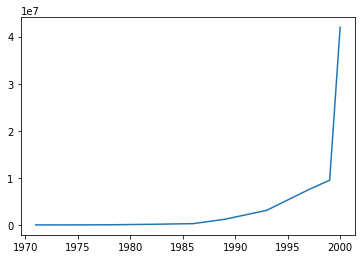

In [ ]:
T.plot()

In [ ]:
T.preveja_linear(2002)

17544428.37448311


In [ ]:
T.preveja_exp(2002)

48613897.269065045


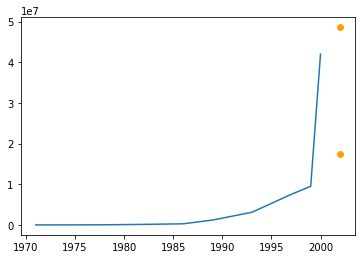

In [ ]:
T.plot() #vemos que a estimativa exponencial é mais adequada.

## Questão 4
Tópico 4, questão 3. </br>
Respondido por Pedro Amaro

### Declarações

In [ ]:
class Integral_Numerica:
  def __init__(self, h):
    self.h = h
    self.x = []
    self.y = []
    self.result_s = 0
    self.result_t = 0

  def add(self, x, y):
    self.x.append(x)
    self.y.append(y)

  def Simpson(self):
    if len(self.y)%2:
      count = -1
      soma = 0
      for i in self.y:
        count = count +1
        if count == 0 or count == len(self.y)-1:
          soma = soma + i
        elif count%2:
          soma = soma + 4*i
        else:
          soma = soma + 2*i
      self.result_s = ((self.h)/3)*(soma)
      print(self.result_s)
    else:
      print("Intervalo invalido para simpson")

  def Trapezio(self):
      count = -1
      soma = 0
      for i in self.y:
        count = count +1
        if count == 0 or count == len(self.y)-1:
          soma = soma + i
        else:
          soma = soma + 2*i
      self.result_t = (self.h/2)*(soma)
      print(self.result_t)

### Entrada de Dados

In [ ]:
I = Integral_Numerica(0.4)

In [ ]:
I.add('A', 3)
I.add('A1', 2.92)
I.add('A2', 2.75)
I.add('A3', 2.52)
I.add('A4', 2.30)
I.add('A5', 1.84)
I.add('A6', 0.92)

In [ ]:
I.Simpson()

5.752


In [ ]:
I.Trapezio()

5.716
